In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

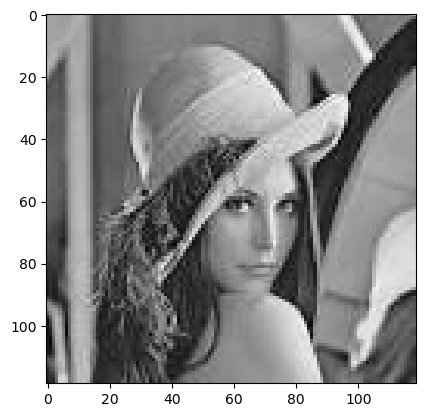

In [2]:
image = cv2.imread("../data/lena.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray")
plt.show()

# Basic Edge Detector

In [3]:
def compute_x_gradients(image):
    return image[:, 1:] - image[:, :-1]


def compute_y_gradients(image):
    return image[1:] - image[:-1]
    

def compute_gradients(image):
    image_x_padded = cv2.copyMakeBorder(image, 0, 0, 0, 1, cv2.BORDER_CONSTANT, value=0)
    image_y_padded = cv2.copyMakeBorder(image, 0, 1, 0, 0, cv2.BORDER_CONSTANT, value=0)
    
    x_grads = compute_x_gradients(image_x_padded)
    y_grads = compute_y_gradients(image_y_padded)
    grads = np.stack([x_grads, y_grads], axis=0)
    return grads

In [96]:
def basic_edge_detection(image):
    grads = compute_gradients(image.astype(np.float64))
    edge = grads[0]**2 + grads[1]**2
    edge /= edge.max()
    # threshold = np.median(edge)
    threshold = 0.01

    edge[edge < threshold] = 0
    edge[edge >= threshold] = 1
    return edge

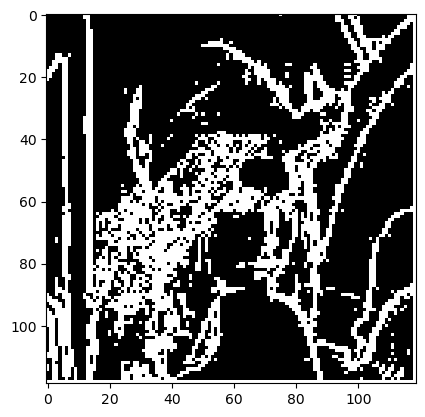

In [97]:
edge = basic_edge_detection(image)
plt.imshow(edge, cmap="gray")
plt.show()

In [98]:
def create_gaussian_filter(sigma):
    size = int(2 * np.pi * sigma)
    if size % 2 == 0: size += 1

    coords = np.arange(size) - size//2
    gaussian_density = np.exp(-0.5 * (coords/sigma)**2)
    gaussian_density = gaussian_density.reshape(-1, 1) * gaussian_density.reshape(1, -1)
    gaussian_density /= gaussian_density.sum()
    return gaussian_density


def gaussian_blur(image, sigma):
    gaussian_filter = create_gaussian_filter(sigma)
    Hf, Wf = gaussian_filter.shape

    image_padded = cv2.copyMakeBorder(image, Hf//2, Hf//2, Wf//2, Wf//2, cv2.BORDER_REFLECT, value=0)
    image_convolved = cv2.filter2D(image_padded, ddepth=-1, kernel=gaussian_filter)
    return image_convolved

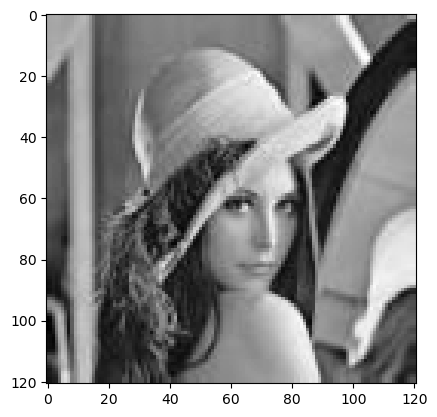

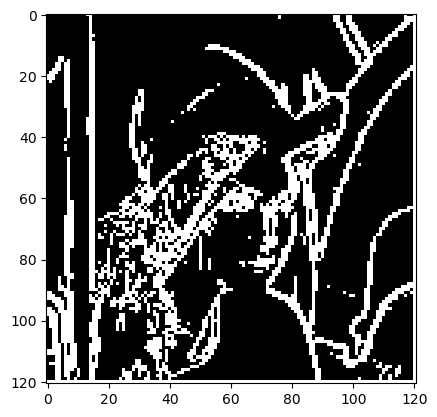

In [99]:
image_blurred = gaussian_blur(image, sigma=0.5)
edge = basic_edge_detection(image_blurred)

plt.imshow(image_blurred, cmap="gray")
plt.show()

plt.imshow(edge, cmap="gray")
plt.show()

# Sobel Edge Detector

In [100]:
def sobel_edge_detection(image):
    x_sobel_kernel = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], dtype=np.float64)

    y_sobel_kernel = np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ], dtype=np.float64)

    image_padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
    image_padded = image_padded.astype(np.float64)

    x_grads = cv2.filter2D(image_padded, ddepth=-1, kernel=x_sobel_kernel)
    y_grads = cv2.filter2D(image_padded, ddepth=-1, kernel=y_sobel_kernel)

    edge = x_grads**2 + y_grads**2
    edge /= edge.max()
    # threshold = np.median(edge)
    threshold = 0.005

    edge[edge < threshold] = 0
    edge[edge >= threshold] = 1
    return edge

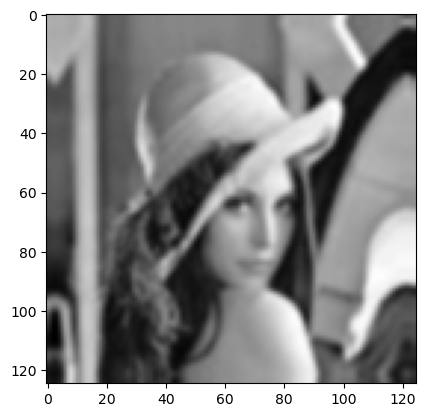

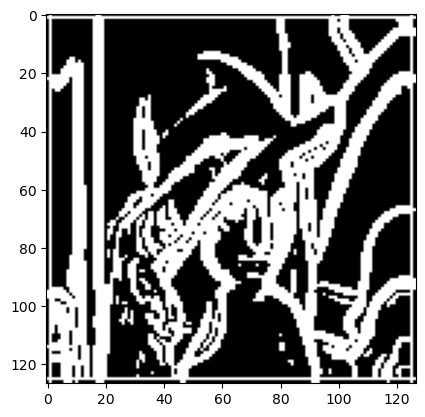

In [101]:
image_blurred = gaussian_blur(image, sigma=1.0)
edge = sobel_edge_detection(image_blurred)

plt.imshow(image_blurred, cmap="gray")
plt.show()

plt.imshow(edge, cmap="gray")
plt.show()

# Laplacian of Gaussian

In [102]:
def laplacian_of_gaussian(image):
    laplace_kernel = np.array([
        [0,  1, 0],
        [1, -4, 1],
        [0,  1, 0]
    ])

    image_padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
    image_padded = image_padded.astype(np.float64)
    image_convolved = cv2.filter2D(image_padded, ddepth=-1, kernel=laplace_kernel)
    
    image_convolved_x_padded = cv2.copyMakeBorder(image_convolved, 0, 0, 0, 1, cv2.BORDER_CONSTANT, value=0)
    image_convolved_y_padded = cv2.copyMakeBorder(image_convolved, 0, 1, 0, 0, cv2.BORDER_CONSTANT, value=0)

    # zero-crossing 부분은 이웃 픽셀의 곱이 음수임
    result1 = image_convolved_x_padded[:, 1:] * image_convolved_x_padded[:, :-1] < 0
    result2 = image_convolved_y_padded[1:] * image_convolved_y_padded[:-1] < 0

    result = result1 | result2
    result = result.astype(np.float64)
    return result

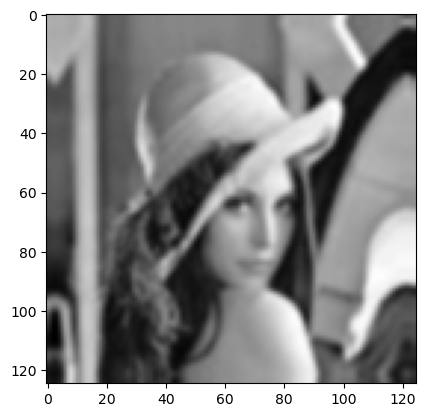

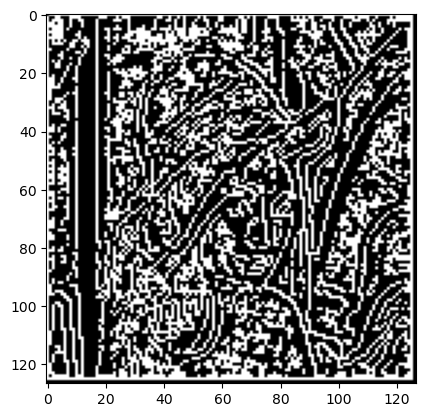

In [105]:
image_blurred = gaussian_blur(image, sigma=1.0)
edge = laplacian_of_gaussian(image_blurred)

plt.imshow(image_blurred, cmap="gray")
plt.show()

plt.imshow(edge, cmap="gray")
plt.show()